<li> XGBoost 버전 확인

In [1]:
import xgboost
xgboost.__version__

'1.5.0'

## 파이썬 래퍼 XGBoost 적용 – 위스콘신 Breast Cancer 데이터 셋
<h4> 데이터 세트 로딩

In [4]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
x_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = x_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())
# 악성 양성

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [33]:
#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label,
                                                   test_size = 0.2, random_state=156)
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


<h4> 학습과 예측 데이터 세트를 DMatrix로 변환

In [13]:
dtrain = xgb.DMatrix(data=x_train, label = y_train)
dtest = xgb.DMatrix(data=x_test, label = y_test)

<h4> 하이퍼 파라미터 설정

In [14]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400

<h4> 주어진 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달하고 학습

In [16]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, evals=wlist)

[13:04:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0

[162]	train-logloss:0.00724	eval-logloss:0.08776
[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:

[330]	train-logloss:0.00533	eval-logloss:0.08587
[331]	train-logloss:0.00532	eval-logloss:0.08589
[332]	train-logloss:0.00532	eval-logloss:0.08592
[333]	train-logloss:0.00531	eval-logloss:0.08584
[334]	train-logloss:0.00531	eval-logloss:0.08574
[335]	train-logloss:0.00530	eval-logloss:0.08582
[336]	train-logloss:0.00529	eval-logloss:0.08589
[337]	train-logloss:0.00529	eval-logloss:0.08594
[338]	train-logloss:0.00528	eval-logloss:0.08583
[339]	train-logloss:0.00528	eval-logloss:0.08591
[340]	train-logloss:0.00527	eval-logloss:0.08583
[341]	train-logloss:0.00526	eval-logloss:0.08573
[342]	train-logloss:0.00526	eval-logloss:0.08568
[343]	train-logloss:0.00525	eval-logloss:0.08572
[344]	train-logloss:0.00525	eval-logloss:0.08580
[345]	train-logloss:0.00524	eval-logloss:0.08582
[346]	train-logloss:0.00524	eval-logloss:0.08571
[347]	train-logloss:0.00523	eval-logloss:0.08579
[348]	train-logloss:0.00523	eval-logloss:0.08583
[349]	train-logloss:0.00522	eval-logloss:0.08573
[350]	train-logloss:

<h4> predict()를 통해 예측 확률값을 반환하고 예측 값으로 변환

In [18]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


<h4> get_clf_eval( )을 통해 예측 평가

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [22]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870, F1 : 0.9806, AUC : 0.9951


<h4> Feature Importance 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

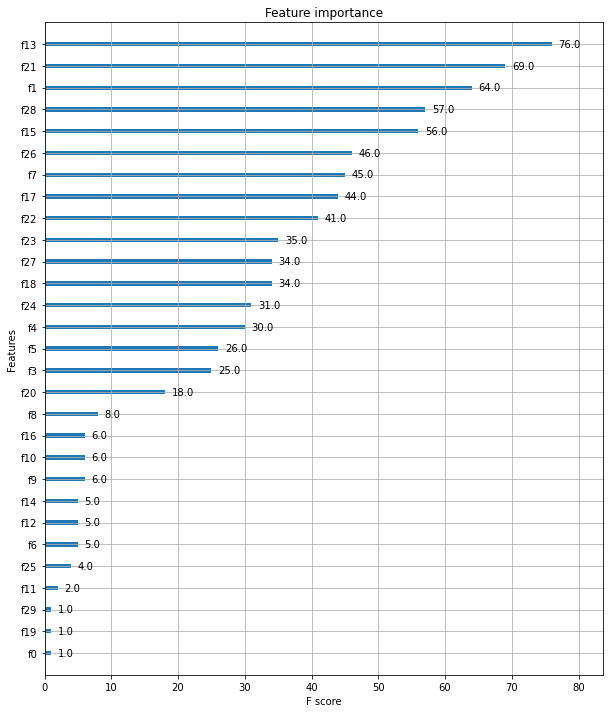

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# subplots 하위의 축 반환
fig,ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax=ax)

## 사이킷런 Wrapper XGBoost 개요 및 적용
<h4> 사이킷런 래퍼 클래스 임포트, 학습 및 예측

In [28]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# train 데이터에서 검증 데이터를 뽑기엔 데이터가 적어서 test 데이터 이용
# 실제에선 이러면 안됨.
evals = [(x_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators = 400, learing_rate = 0.1, max_depth=3)
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds = 400, eval_set = evals,
               eval_metric= 'logloss', verbose=True)

w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

[13:13:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "learing_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.47984
[1]	validation_0-logloss:0.36218
[2]	validation_0-logloss:0.29004
[3]	validation_0-logloss:0.23382
[4]	validation_0-logloss:0.19901
[5]	validation_0-logloss:0.17469
[6]	validation_0-logloss:0.15549
[7]	validation_0-logloss:0.13367
[8]	validation_0-logloss:0.12411
[9]	validation_0-logloss:0.11611
[10]	validation_0-logloss:0.10768
[11]	validation_0-logloss:0.10018
[12]	validation_0-logloss:0.09754
[13]	validation_0-logloss:0.08920
[14]	validation_0-logloss:0.09259
[15]	validation_0-logloss:0.09144
[16]	validation_0-logloss:0.09066
[17]	validation_0-logloss:0.09058
[18]	validation_0-logloss:0.08894
[

[227]	validation_0-logloss:0.07820
[228]	validation_0-logloss:0.07820
[229]	validation_0-logloss:0.07820
[230]	validation_0-logloss:0.07820
[231]	validation_0-logloss:0.07820
[232]	validation_0-logloss:0.07820
[233]	validation_0-logloss:0.07820
[234]	validation_0-logloss:0.07820
[235]	validation_0-logloss:0.07820
[236]	validation_0-logloss:0.07820
[237]	validation_0-logloss:0.07820
[238]	validation_0-logloss:0.07820
[239]	validation_0-logloss:0.07820
[240]	validation_0-logloss:0.07820
[241]	validation_0-logloss:0.07820
[242]	validation_0-logloss:0.07820
[243]	validation_0-logloss:0.07820
[244]	validation_0-logloss:0.07820
[245]	validation_0-logloss:0.07820
[246]	validation_0-logloss:0.07820
[247]	validation_0-logloss:0.07820
[248]	validation_0-logloss:0.07820
[249]	validation_0-logloss:0.07820
[250]	validation_0-logloss:0.07820
[251]	validation_0-logloss:0.07820
[252]	validation_0-logloss:0.07820
[253]	validation_0-logloss:0.07820
[254]	validation_0-logloss:0.07820
[255]	validation_0-l

In [29]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[35  2]
 [ 3 74]]
정확도 : 0.9561, 정밀도 : 0.9737, 재현율 : 0.9610, F1 : 0.9673, AUC : 0.9961


<h4> early stopping을 100으로 설정하고 재 학습/예측/평가

In [30]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learing_rate = 0.1, mat_depth=3)

evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds= 100, eval_metric = "logloss",
               eval_set = evals, verbose= True)
ws100_pred = xgb_wrapper.predict(x_test)
ws100_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

[13:16:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "learing_rate", "mat_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.48000
[1]	validation_0-logloss:0.36319
[2]	validation_0-logloss:0.29276
[3]	validation_0-logloss:0.24302
[4]	validation_0-logloss:0.20856
[5]	validation_0-logloss:0.19028
[6]	validation_0-logloss:0.17372
[7]	validation_0-logloss:0.15962
[8]	validation_0-logloss:0.15152
[9]	validation_0-logloss:0.14288
[10]	validation_0-logloss:0.13867
[11]	validation_0-logloss:0.13577
[12]	validation_0-logloss:0.13161
[13]	validation_0-logloss:0.12886
[14]	validation_0-logloss:0.12649
[15]	validation_0-logloss:0.13126
[16]	validation_0-logloss:0.12895
[17]	validation_0-logloss:0.12712
[18]	validation_0-logl

[227]	validation_0-logloss:0.11789
[228]	validation_0-logloss:0.11789
[229]	validation_0-logloss:0.11789
[230]	validation_0-logloss:0.11789
[231]	validation_0-logloss:0.11789
[232]	validation_0-logloss:0.11789
[233]	validation_0-logloss:0.11789
[234]	validation_0-logloss:0.11789
[235]	validation_0-logloss:0.11789
[236]	validation_0-logloss:0.11789
[237]	validation_0-logloss:0.11789
[238]	validation_0-logloss:0.11789
[239]	validation_0-logloss:0.11789
[240]	validation_0-logloss:0.11789
[241]	validation_0-logloss:0.11789
[242]	validation_0-logloss:0.11789
[243]	validation_0-logloss:0.11789
[244]	validation_0-logloss:0.11789
[245]	validation_0-logloss:0.11789
[246]	validation_0-logloss:0.11789
[247]	validation_0-logloss:0.11789


In [31]:
get_clf_eval(y_test, ws100_pred, ws100_pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도 : 0.9561, 정밀도 : 0.9615, 재현율 : 0.9740, F1 : 0.9677, AUC : 0.9912


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

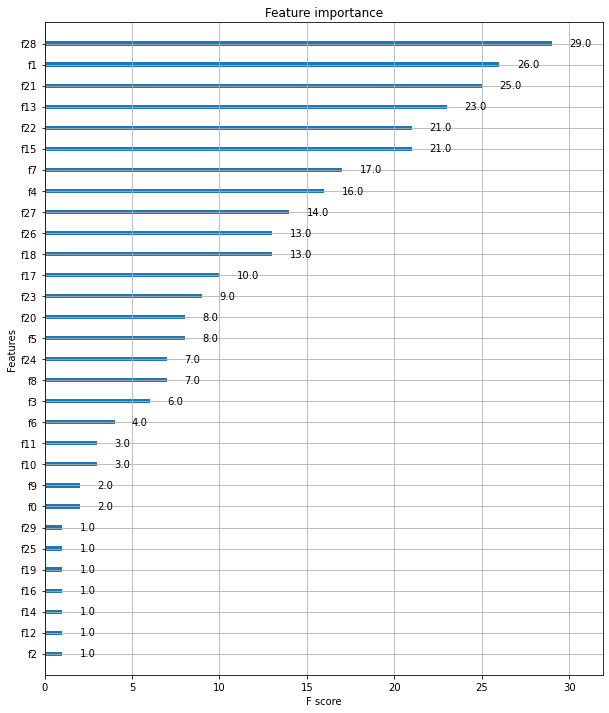

In [32]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_wrapper, ax=ax)

In [39]:
import lightgbm

print(lightgbm.__version__)

3.3.1


## LightGBM 적용 – 위스콘신 Breast Cancer Prediction

In [48]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
x_train, x_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals =[(x_test,y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds = 100, eval_metric="logloss",
                eval_set = evals, verbose = 1)

preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [43]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율 : 0.9870, F1 : 0.9682, AUC : 0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

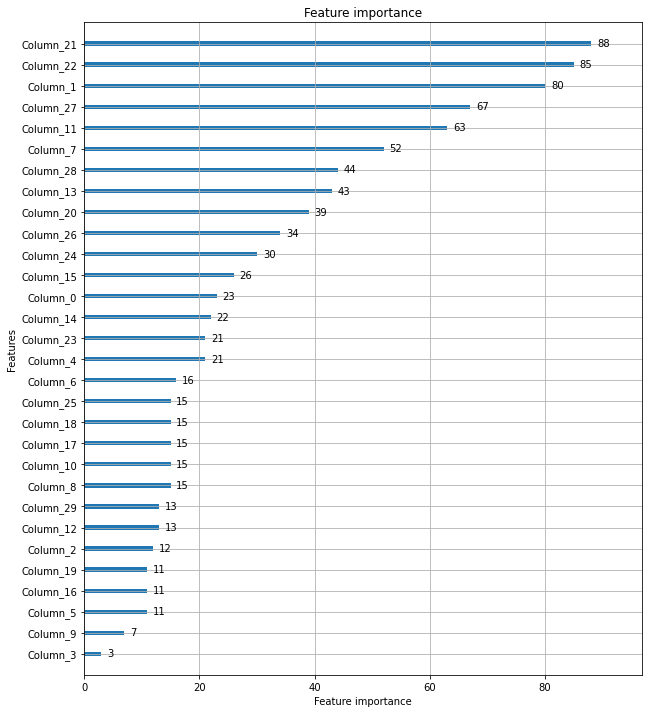

In [44]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgbm_wrapper, ax=ax)

In [46]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Basic Stacking Model

<h4> 데이터 로딩

In [2]:
import numpy as np 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

x_data = cancer_data.data
y_label = cancer_data.target

x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.2, random_state=0)

<h4>개별 Classifier와 최종 Stacking 데이터를 학습할 메타 Classifier 생성

In [4]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

<h4> 개별 Classifier 학습/예측/평가

In [6]:
# 개별 모델들을 학습. 
knn_clf.fit(x_train, y_train)
rf_clf.fit(x_train,y_train)
dt_clf.fit(x_train,y_train)
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [15]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
dt_pred = dt_clf.predict(x_test)
ada_pred = ada_clf.predict(x_test)

print('KNN 정확도 : {0:.4f}'.format(accuracy_score(knn_pred,y_test)))
print('RandomForest 정확도 : {0:.4f}'.format(accuracy_score(rf_pred,y_test)))
print('DecisionTree 정확도 : {0:.4f}'.format(accuracy_score(dt_pred,y_test)))
print('AdaBoost 정확도 : {0:.4f}'.format(accuracy_score(ada_pred,y_test)))

KNN 정확도 : 0.9211
RandomForest 정확도 : 0.9649
DecisionTree 정확도 : 0.9035
AdaBoost 정확도 : 0.9561


<h4> 개별 모델의 예측 결과를 메타 모델이 학습할 수 있도록 스태킹 형태로 재 생성

In [17]:
import pandas as pd 

pred = np.array([knn_pred,rf_pred,dt_pred,ada_pred])
print(pred.shape)
print(pd.DataFrame(pred)) # 알아보기 쉽게 데이터프레임형태로 잠시 확인

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)
print(pd.DataFrame(pred))

(4, 114)
   0    1    2    3    4    5    6    7    8    9    ...  104  105  106  107  \
0    0    1    1    0    1    1    1    1    1    1  ...    0    1    0    0   
1    0    1    1    1    1    1    1    1    1    1  ...    0    1    0    1   
2    0    1    1    0    1    1    1    1    1    1  ...    0    1    0    1   
3    0    1    1    1    1    1    1    1    1    1  ...    0    1    0    1   

   108  109  110  111  112  113  
0    0    0    1    0    0    1  
1    0    0    1    0    0    1  
2    0    1    1    0    0    1  
3    1    0    1    0    0    1  

[4 rows x 114 columns]
(114, 4)
     0  1  2  3
0    0  0  0  0
1    1  1  1  1
2    1  1  1  1
3    0  1  0  1
4    1  1  1  1
..  .. .. .. ..
109  0  0  1  0
110  1  1  1  1
111  0  0  0  0
112  0  0  0  0
113  1  1  1  1

[114 rows x 4 columns]


<h4> 메타 모델 학습/예측/평가

In [19]:
# 오버 피팅이 진행됨. 따라서 다음에 교차검증 스태킹 진행
lr_final.fit(pred,y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,final)))

최종 메타 모델의 예측 정확도 : 0.9737


<h4> CV 셋 기반의 Stacking

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, x_train_n, y_train_n, x_test_n, n_folds) :
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits = n_folds, shuffle=False)
    
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((x_train_n.shape[0], 1)) # 2차원 데이터
    test_pred = np.zeros((x_test_n.shape[0], n_folds)) # 평균계산을 위해 n_folds 사용 
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(x_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print("\t 폴드 세트 : ",folder_counter,'시작')
        x_tr = x_train_n[train_index]
        y_tr = y_train_n[train_index]
        x_te = x_train_n[valid_index] # 검증데이터 세트
        
        #폴드 세트 내부의 학습 데이터 기반 학습 수행.
        model.fit(x_tr, y_tr)
        
        #폴드 세트 내부의 검증 데이터 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, : ] = model.predict(x_te).reshape(-1,1)
        
        #원본 테스트 데이터를 학습폴드를 기반으로 하여 예측 후 데이터 저장. 
        test_pred[:,folder_counter] = model.predict(x_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean    

In [27]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, x_train, y_train, x_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, x_train, y_train, x_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, x_train, y_train, x_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf,x_train, y_train, x_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
RandomForestClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
AdaBoostClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작


In [29]:
stack_final_x_train = np.concatenate((knn_train, rf_train, dt_train, ada_train),axis=1)
stack_final_x_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print("원본 학습 피처 데이터 shape : ",x_train.shape, "원본 테스트 피처 shape",x_test.shape)
print("스태킹 학습 피처 데이터 shape : ",stack_final_x_train.shape,
     '스태킹 테스트 피처 데이터 shape : ',stack_final_x_test.shape)

원본 학습 피처 데이터 shape :  (455, 30) 원본 테스트 피처 shape (114, 30)
스태킹 학습 피처 데이터 shape :  (455, 4) 스태킹 테스트 피처 데이터 shape :  (114, 4)


In [30]:
lr_final.fit(stack_final_x_train,y_train)
stack_final = lr_final.predict(stack_final_x_test)

print("최종 메타 모델의 예측 정확도 : {0:.4f}".format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도 : 0.9737
